# Importing necessary libraries and the dataset

In [1]:
import pandas as pd
file_location="C:/Users/bhavy/Downloads/Airpassengers.csv"
air_passengers_data=pd.read_csv(file_location)
air_passengers_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
air_passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
air_passengers_data['Month']=pd.to_datetime(air_passengers_data['Month'],infer_datetime_format=True)

In [4]:
air_passengers_data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
air_passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
air_passengers_data=air_passengers_data.set_index(['Month'])


In [7]:
air_passengers_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
air_passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Data visualization using matplotlib

Analyzing ETS patterns
a)Error in dataset that can be seen from plot in 1954 period
b)Trends in dataset
c)seasonality in dataset

there is no cyclicity in the given dataset

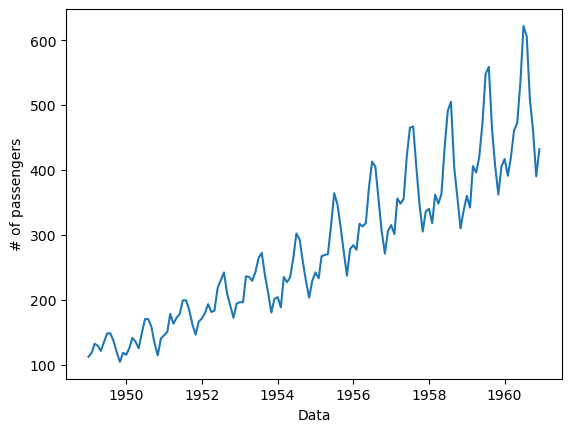

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Data')
plt.ylabel('# of passengers')
plt.plot(air_passengers_data)
plt.show()

Analyzing rolling mean and standard deviation using window/period =12 to see whether they are constant or zero in whole dataset or not.

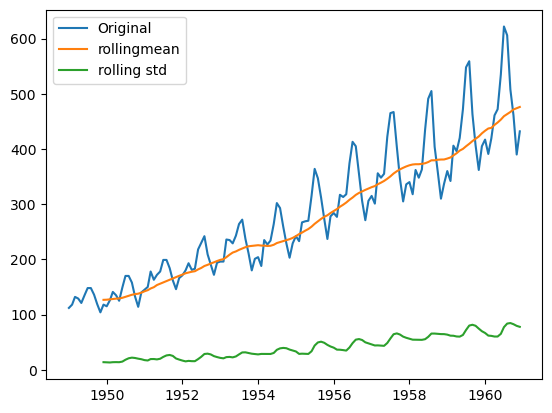

In [10]:
rolmean=air_passengers_data.rolling(window=12).mean()
rolstd=air_passengers_data.rolling(window=12).std()
org=plt.plot(air_passengers_data,label='Original')
mean=plt.plot(rolmean,label='rollingmean')
std=plt.plot(rolstd,label='rolling std')
plt.legend(loc='best')
plt.show()


1.From the graph rolling mean has a trend component
2.Rolling standard deviation is fairly constant with time
3.For this time series to be stationary I need to ensure that both the rolling statistics(avg and std.dev) remain time invariant or constant with time.

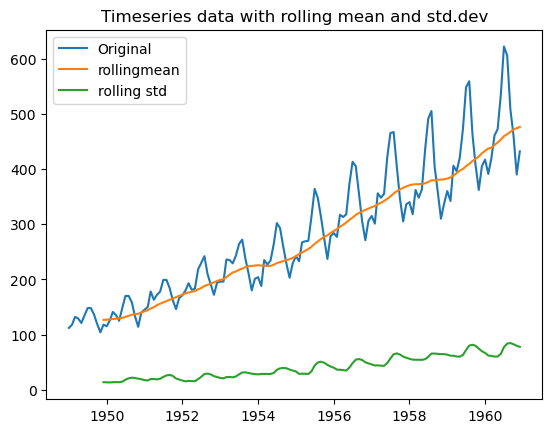

In [11]:
def plot_graph(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    org=plt.plot(timeseries,label='Original')
    mean=plt.plot(rolmean,label='rollingmean')
    std=plt.plot(rolstd,label='rolling std')
    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and std.dev')
    plt.show()

plot_graph(air_passengers_data)

Augmented dickey fuller test for finding p-value 

In [12]:
def adcf_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    dftest=adfuller(timeseries)
    print(dftest)
adcf_test(air_passengers_data)


(0.8153688792060502, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [13]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    org=plt.plot(timeseries,label='Original')
    mean=plt.plot(rolmean,label='rollingmean')
    std=plt.plot(rolstd,label='rolling std')
    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and std.dev')
    plt.show()
    from statsmodels.tsa.stattools import adfuller
    dftest=adfuller(timeseries)
    dfoutput=pd.Series(dftest[0:4],index=['The test statistic','Mackinson approximate p-value','#usedlags','NOBS'])
    print(dfoutput)

    
    
    

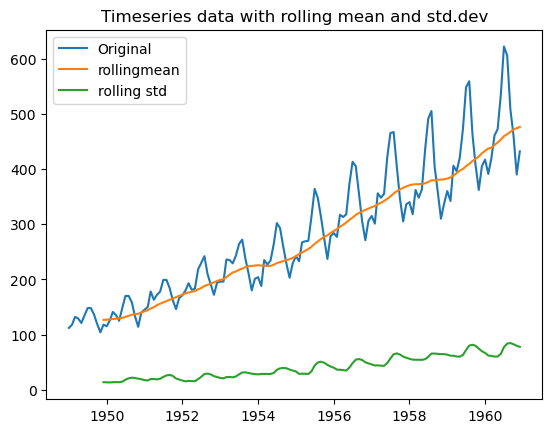

The test statistic                 0.815369
Mackinson approximate p-value      0.991880
#usedlags                         13.000000
NOBS                             130.000000
dtype: float64


In [14]:
test_stationarity(air_passengers_data)

Here the p-value is greater than 0.05 which states that the null hypothesis is true(data is not stationary) and p value needed to be improved further by using logarithmic scaling.

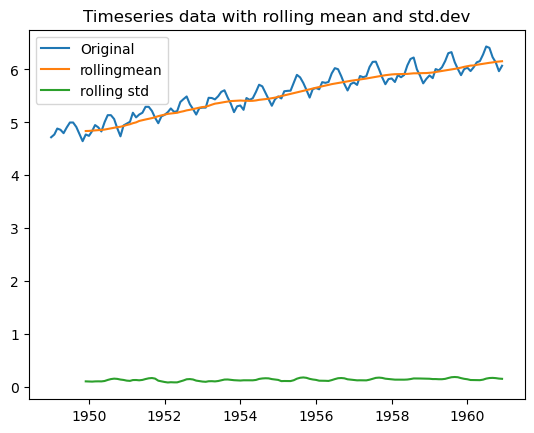

The test statistic                -1.717017
Mackinson approximate p-value      0.422367
#usedlags                         13.000000
NOBS                             130.000000
dtype: float64


In [15]:
import numpy as np
air_passengers_data_log_scaled=np.log(air_passengers_data)
test_stationarity(air_passengers_data_log_scaled)

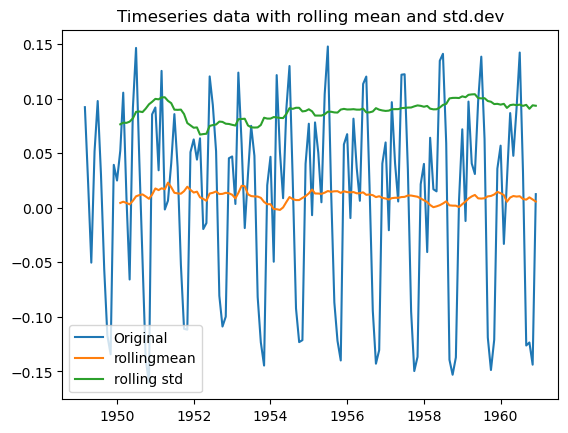

The test statistic                -3.040034
Mackinson approximate p-value      0.031321
#usedlags                         11.000000
NOBS                             130.000000
dtype: float64


In [16]:
ma=air_passengers_data_log_scaled.rolling(window=3).mean()
air_passengers_data_log_scaled_minus_ma=air_passengers_data_log_scaled-ma
air_passengers_data_log_scaled_minus_ma.dropna(inplace=True)
test_stationarity(air_passengers_data_log_scaled_minus_ma)


p value now is less than 0.05 which states that nullhypothesis is false that data is stationary and can be used for further analysis

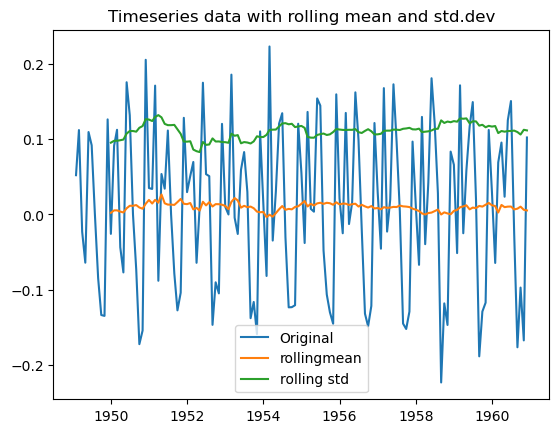

The test statistic                -2.717131
Mackinson approximate p-value      0.071121
#usedlags                         14.000000
NOBS                             128.000000
dtype: float64


In [17]:
air_passengers_data_log_scaled_ps=air_passengers_data_log_scaled.diff(periods=1)
air_passengers_data_log_scaled_ps.dropna(inplace=True)
test_stationarity(air_passengers_data_log_scaled_ps)

To find p,d,q values we use autocorrelation function , partial autocorrelation function and their plots

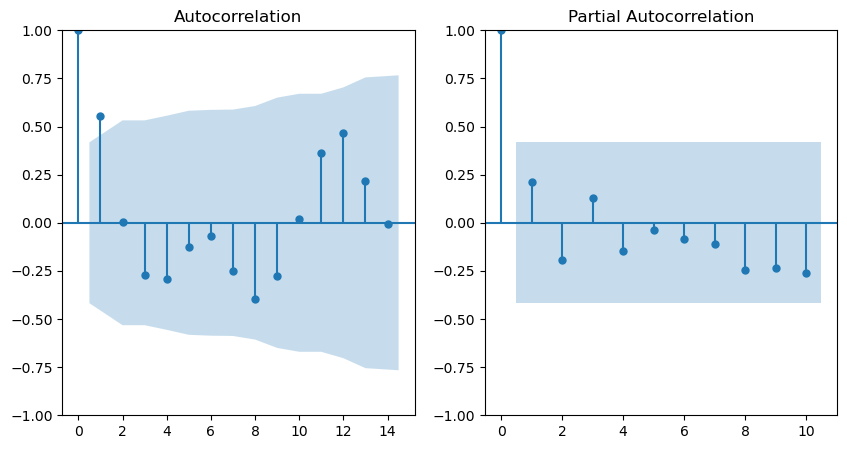

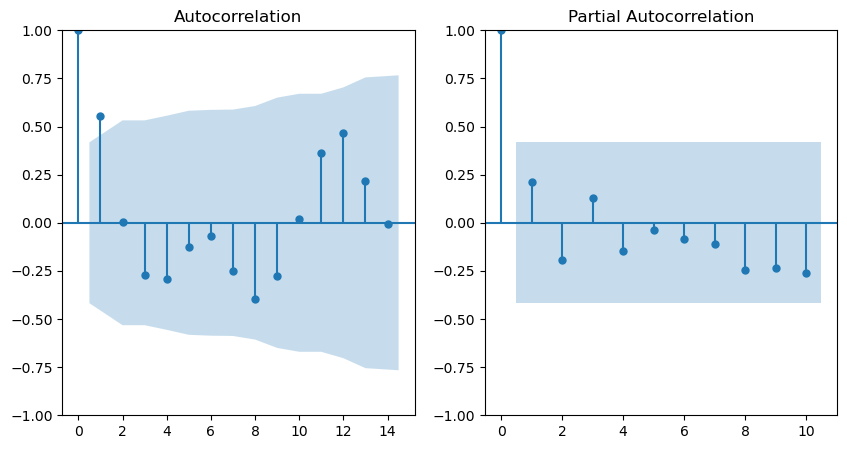

In [18]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
lag_acf=acf(air_passengers_data_log_scaled_minus_ma)
lag_pacf=pacf(air_passengers_data_log_scaled_minus_ma)
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(lag_acf,ax=ax[0])
plot_pacf(lag_pacf,lags=10,alpha=0.05,method='ywm',title='Partial Autocorrelation',ax=ax[1])


1.Auto-regressive (p-value)=1 (from PACF plot)
2.Differentiation (d-value)=2 (from the window/period value)
3.Moving-average (q-value)=2 (from ACF plot)

# ARIMA MODEL

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
air_passengers_data_log_scaled_minus_ma.dropna(inplace=True)
train,test=train_test_split(air_passengers_data_log_scaled_minus_ma,test_size=0.10,shuffle=False)
model_arima=ARIMA(train,order=(15,2,2))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.predict(start='1959-10-01',end='1960-12-01')

C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

In [20]:
test.tail()

,#Passengers
Month,
1960-08-01,0.032851
1960-09-01,-0.126286
1960-10-01,-0.123522
1960-11-01,-0.143862
1960-12-01,0.012435


In [21]:
from sklearn.metrics import mean_squared_error 
error=mean_squared_error(test,predictions)
print('Test MSE %.5f' %error)

Test MSE 0.00080


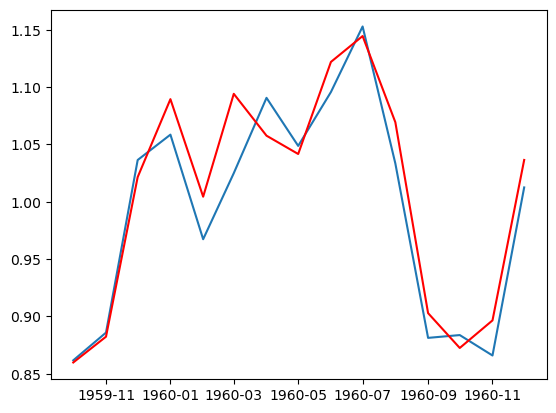

In [22]:
predict=np.exp(predictions)
test_set=np.exp(test)
plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()



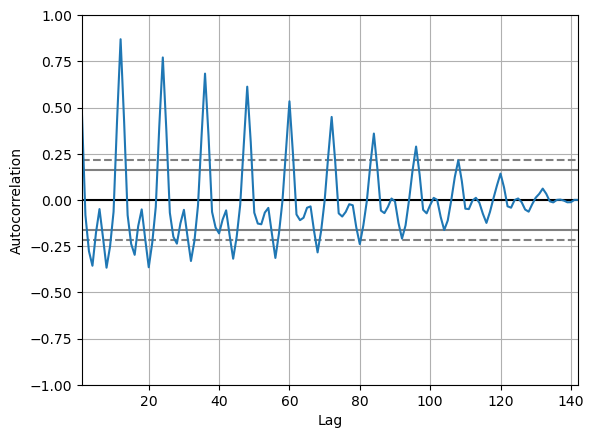

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(air_passengers_data_log_scaled_minus_ma)
plt.show()


# AR MODEL

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
air_passengers_data_log_scaled_minus_ma.dropna(inplace=True)
train,test=train_test_split(air_passengers_data_log_scaled_minus_ma,test_size=0.10,shuffle=False)
model_arima=ARIMA(train,order=(15,2,0))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.predict(start='1959-10-01',end='1960-12-01')

C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization faile

In [25]:
test.tail()

,#Passengers
Month,
1960-08-01,0.032851
1960-09-01,-0.126286
1960-10-01,-0.123522
1960-11-01,-0.143862
1960-12-01,0.012435


In [26]:
from sklearn.metrics import mean_squared_error 
error=mean_squared_error(test,predictions)
print('Test MSE %.5f' %error)

Test MSE 0.00278


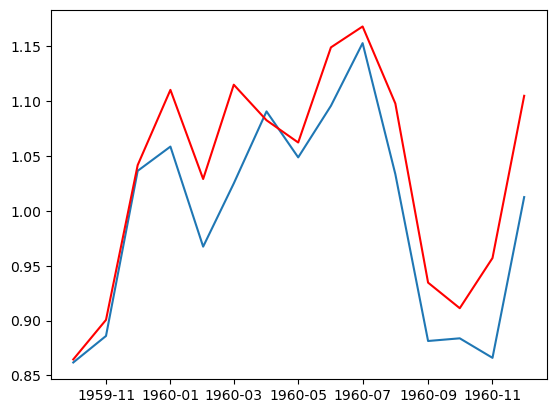

In [27]:
predict=np.exp(predictions)
test_set=np.exp(test)
plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()



ARIMA is better than the AR model in respect to the mean squared error value

# MOVING AVERAGE MODEL

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
air_passengers_data_log_scaled_minus_ma.dropna(inplace=True)
train,test=train_test_split(air_passengers_data_log_scaled_minus_ma,test_size=0.10,shuffle=False)
model_arima=ARIMA(train,order=(0,2,2))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.predict(start='1959-10-01',end='1960-12-01')

C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [29]:
test.tail()

,#Passengers
Month,
1960-08-01,0.032851
1960-09-01,-0.126286
1960-10-01,-0.123522
1960-11-01,-0.143862
1960-12-01,0.012435


In [30]:
from sklearn.metrics import mean_squared_error 
error=mean_squared_error(test,predictions)
print('Test MSE %.5f' %error)

Test MSE 0.02861


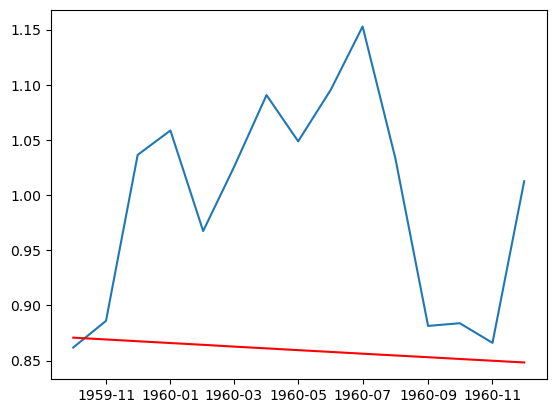

In [31]:
predict=np.exp(predictions)
test_set=np.exp(test)
plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()


ARIMA is again better than the MA in respect to the MSE 

# ARMA MODEL

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
air_passengers_data_log_scaled_minus_ma.dropna(inplace=True)
train,test=train_test_split(air_passengers_data_log_scaled_minus_ma,test_size=0.10,shuffle=False)
model_arima=ARIMA(train,order=(15,0,2))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.predict(start='1959-10-01',end='1960-12-01')

C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization faile

In [33]:
test.tail()

,#Passengers
Month,
1960-08-01,0.032851
1960-09-01,-0.126286
1960-10-01,-0.123522
1960-11-01,-0.143862
1960-12-01,0.012435


In [34]:
from sklearn.metrics import mean_squared_error 
error=mean_squared_error(test,predictions)
print('Test MSE %.5f' %error)

Test MSE 0.00062


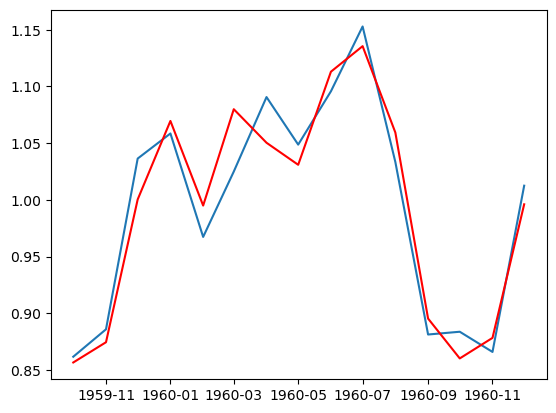

In [35]:
predict=np.exp(predictions)
test_set=np.exp(test)
plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()


ARIMA , ARMA are giving better scores of MSE

# RESIDUAL SCORE FOR ARMA

<Axes: ylabel='Density'>

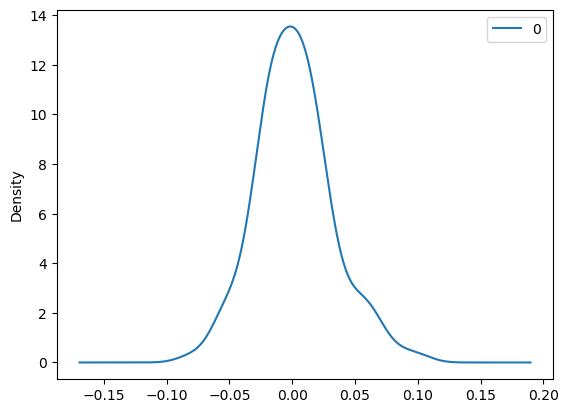

In [36]:
from pandas import DataFrame
residual=DataFrame(model_arima_fit.resid)
residual.plot(kind='kde')

# Checking residual score for ARIMA model

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
air_passengers_data_log_scaled_minus_ma.dropna(inplace=True)
train,test=train_test_split(air_passengers_data_log_scaled_minus_ma,test_size=0.10,shuffle=False)
model_arima=ARIMA(train,order=(15,2,2))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.predict(start='1959-10-01',end='1960-12-01')

C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bhavy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

In [38]:
test.tail()

,#Passengers
Month,
1960-08-01,0.032851
1960-09-01,-0.126286
1960-10-01,-0.123522
1960-11-01,-0.143862
1960-12-01,0.012435


In [39]:
from sklearn.metrics import mean_squared_error 
error=mean_squared_error(test,predictions)
print('Test MSE %.5f' %error)

Test MSE 0.00080


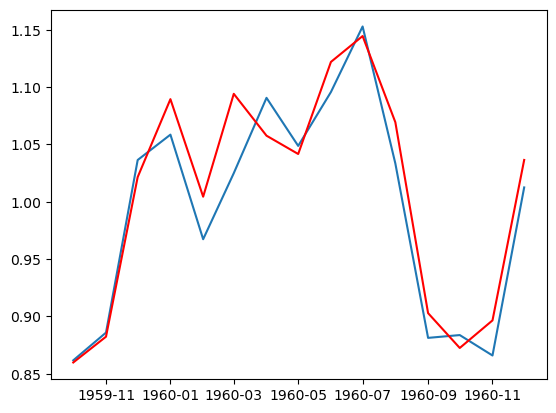

In [40]:
predict=np.exp(predictions)
test_set=np.exp(test)
plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()


<Axes: ylabel='Density'>

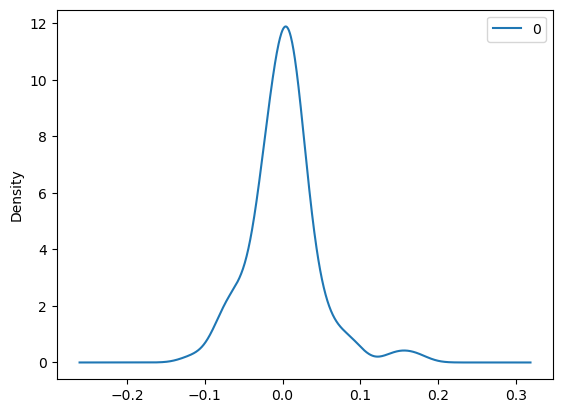

In [41]:
from pandas import DataFrame
residual=DataFrame(model_arima_fit.resid)
residual.plot(kind='kde')